# Wine Classification using Gaussian Naive Bayes

### <div class="alert alert-info">Bayes Rule</div>

Bayes Rule or Bayes Theorem describes the probability of "causes". It defines the probability of occurrence of an event related to any condition. In other words, the theorem helps us to alter our beliefs when we have a new and relevant  piece of information. 

Bayes Theorem is given by the formula: 
               **P(A|B) = (P(B|A).P(A))/P(B)**

It says, the probability of the event A given the condition B is directly proportional to the pior (P(A)- the total probability of A without any condition) and likelihood (P(B|A)- the probability of observing the new evidence, given our initial hypothesis) and inversely proportional to the marginal likelihood (P(B)- the total probability of condition/evidence).

### <div class="alert alert-info">Naive Bayes classifier</div>

It is a classification algorithm built based on the Bayes Theorem. It classifies the data based on the assumption that every feature in the class is independent of any other feature present in the class. The name "naive" is derived as this assumption is very naive. However, this technique is found to be very effective on large and complex datasets and it also helps in building the models to make quick decisions. This classifier algorithm is frequently used in spam filtration, Sentimental analysis, and classifying articles.

### <div class="alert alert-info">Model Building</div>

The wine dataset is loaded from the scikit-learn library datasets. It is split into training and testing sets using a stratified sampling method with a random state to reproduce the results consistently. A Gaussian Naive Bayes model is then trained using the training data to predict the class labels of the wine in the test dataset. Finally, the performance of the prediction model is evaluated using various metrics, including the accuracy score, which measures the fraction of correct predictions made by the model. These evaluation metrics are displayed to provide insights into the effectiveness of the model.

In [3]:
#importing the libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#loading the wine dataset from sklearn library
wine_data = load_wine()
    
#View the dataset description
print(wine_data.DESCR) 

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [5]:
#Viewing the shape of data and target variables
print("Shape of Predictors: ", wine_data.data.shape)
print("Shape of Target: ", wine_data.target.shape)

Shape of Predictors:  (178, 13)
Shape of Target:  (178,)


In [6]:
# splitting the dataset into training and testing sets in the ratio 3:1
""" The function train_test_split() is used to split the dataset
    Args:
        *arrays :
                X: 13 predictors variables from wine dataset
                Y: target variable that contains 'class' of the wine (3 unique values)  
        test_size: (float or int)
                The proportion of the dataset to include in the test split
        random_state: (int) 
                Controls the shuffling applied to the data before applying the split. Promotes reproducible output 
                across multiple function calls.
        stratify: (array-like)
                Stratified sampling is done based on the variable passed; based on the class of variables. There are 3 
                classes and the samples per class is [59,71,48]. The test data in stratified sampling is [15,18,12].
                
    Returns:
        splitting: (lists)
                Returns 2*len(arrays). Four lists are returned and they are stored in variables. 
"""
X_train, X_test, y_train, y_test = train_test_split(wine_data.data,
                                                        wine_data.target,
                                                        test_size = 0.25,
                                                        random_state = 2022,
                                                        stratify = wine_data.target)
    

In [7]:
# Using Gaussian Naive Bayes model to fit the data
classifyWine = GaussianNB()
classifyWine.fit(X_train, y_train)
   

GaussianNB()

In [8]:
# Predicting the lables of the test data using the model created
predicted_Data = classifyWine.predict(X_test)

In [13]:
# Creating a confusion matrix to compare the predicted values and the expected values
cm = metrics.confusion_matrix(y_test, predicted_Data)

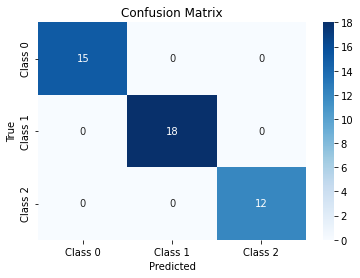

In [14]:
# Plot confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [15]:
# Generating classification report
print(metrics.classification_report(y_test, predicted_Data, target_names=wine_data.target_names))

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        15
     class_1       1.00      1.00      1.00        18
     class_2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [16]:
# returns the accuracy score of the prediction model
""" Calculating the accuracy score using metrics.accuracy_score()
        Args:
            y_true : The actual values of y
            y_predicted : The predicted values of y using the prediction model
        Returns:
            score: If normalize == True (default), return the fraction of correctly classified samples (float), else 
            returns the number of correctly classified samples (int).
"""
print("Model Accuracy : ", metrics.accuracy_score(y_test, predicted_Data)*100)

Model Accuracy :  100.0


### <div class="alert alert-info">Conclusion</div>
 The Gaussian Naive Bayes model built using the training dataset is found to have 100% accuracy in predicting the class of wines when tested with the testing dataset. Also, it is noted that, when the sample method is not stratified, the accuracy of the prediction model for same size of train and test samples is only 97.7%. Thus, we can conclude that stratified sampling method with 75% of the data for training the Gaussian Naive Bayes model is the best model for this wine dataset. 